In [ ]:
# FILL THESE IN:

# Name:
# Honor Code Pledge: 

# Project 2A

## Introduction

<img src=goodplace2.png align=right width=500>

The TV show *The Good Place* is centered around a number of humans who have died and find themselves in the afterlife.  In this conception
of the afterlife, humans are sent to "the Good Place" or "the Bad Place" after death.  All humans are assigned a numerical score based on the morality of their conduct in life, and only those with the very highest scores are sent to the "Good Place", where they enjoy eternal happiness; all others experience an eternity of torture in the "Bad Place."

In this project, you will explore using logistic regression to predict whether someone will end up in the "Good Place" or the "Bad Place" based on an
extremely scaled down version of their conduct in life.  In particular, we have data for 1000 people about how often they:

- Let someone merge in front of them in traffic
- Didn't tip their server at a restaurant
- Held a door open for someone who was walking behind them
- Littered

These will be our four features for the problem.  Our data set consists of these four features tallied for 1000 different people.

To complete this project, you will write Python code in places marked
`# YOUR CODE HERE`.  There are also code cells in this notebook you must run
to produce various kinds of plots and graphs.  There are also a number of cells
marked with `# YOUR ANSWER HERE` where you will answer questions.


In [ ]:
# Set up libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy

In [ ]:
# Read data

# Write code below to read the CSV file "data1.csv" and put it into a
# Pandas dataframe called `df`:

# YOUR CODE HERE



## Explanation of the data file

Each row of the file represents data about a person.  

The first four columns should be self-explanatory: they tell how often a person did a
certain activity (explained above).  There are two columns at the end saying whether they
ended up in the "Good Place" or the "Bad Place."

The first of the two (`goodbad`) is calculated "perfectly" from a formula I came up with (that I'm keeping secret!)
"Perfectly" meaning that the formula itself probably isn't perfect, but the good/bad column is calculated
directly mathematically from the formula, based on the four features.

The second of the two (`noisygoodbad`) is also calculated perfectly from the formula, but
with some "noise" thrown in.  In other words, I've switched a few of the goods to bads and vice versa, to
simulate a real-world situation (where the Good Place/Bad Place determination is based not only on this
data, but other data as well that we don't have access to).

In [ ]:
# Display the first few and last few lines of this data:

print(len(df)) # Should be 1000
df  # Verify this looks ok

In [ ]:
# Select our X and y data

# First, we will split the data frame above into a four-column frame
# with the input features (X's) and a one-column frame with the target
# feature (y), which we will use the noisy column (noisygoodbad).

# Write code below to create df_X with just the four X feature columns,
# and df_y that has just the noisygoodbad column.

# Then **normalize** the X values with Z-score normalization as in 
# project 1.

# YOUR CODE HERE



In [ ]:
# Sanity check for df_X

df_X  # Should print a data frame with 1000 rows and 4 columns.
# First row should be [ -1.161413 -1.267048 -1.350553 -1.620752]

In [ ]:
# Sanity check for df_y

df_y  # Should be a column of goods and bads, starting with good, bad, good, good, good....

In [ ]:
# Now we need to switch df_y to not have good/bad strings, but rather 0's and 1's.
# Use this line of code:

df_y = (df_y == 'good').astype(int)

# Sanity check: should now be a column of ones and zeros, with 1=good, 0=bad.  
df_y   # Should begin 1, 0, 1, 1, 1, ...

In [ ]:
# Sanity check shapes:

print(df_X.shape) # Should be (1000, 4)
print(df_y.shape) # Should be (1000,)

In [ ]:
# Split the data into training and testing.

# We want to write code to split the data frame above into a few
# new data frames.  In particular, are going to have a TRAINING SET
# and a TESTING SET for this project.  We will use 80% of the data for 
# training, and the remaining 20% for testing.  

# In the real world, we would split the data randomly, but so we all
# end up with the same results, we will use the first 80% of the data
# for training, and the last 20% for testing (in order of how the rows
# show up in the file).  Note that there are 1000 people (rows in 
# the file), so the first 800 rows will be training, and the last 200
# will be testing.

# Write code here to create FOUR NUMPY ndarrays:

# - X_train: first 800 lines of df_X
# - X_test: last 200 lines of df_X
# - y_train: first 800 lines of df_y
# - y_test: last 200 lines of df_y

# Then, add a column of ones to the left side of X_train and X_test.

# YOUR CODE HERE



In [ ]:
# Sanity checks:

print(X_train.shape) # Should be (800, 5)
print(y_train.shape) # Should be (800,) 
print(X_test.shape) # Should be (200, 5)
print(y_test.shape) # Should be (200,) 

In [ ]:
# Show first few rows of training/testing data:  (will be useful to have these later)

print("First 10 training examples:")
print(np.hstack([X_train, y_train.reshape(-1, 1)])[0:10])
print()
print("First 10 testing examples:")
print(np.hstack([X_test, y_test.reshape(-1, 1)])[0:10])

## Part A

Like in Part A of the previous project, we will rely on an external method to create
a logistic regression model for us, then we will see if we can replicate it ourselves.

Below is code that uses scikit-learn to do this for us.  Don't worry too much about what it does.

In [ ]:
# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and train it on our training data:
model = LogisticRegression(random_state=0, penalty=None, fit_intercept=False).fit(X_train, y_train)

# If the line above gives an error about penalty=None, try switching that part to penalty='none' instead.

# model.coef_ contains the w vector that this logistic regression model was able to find, so
# we'll treat it as the "best" w and see if we can match it manually.
w_direct = model.coef_[0]

print("w found through scikit-learn:", w_direct)

In [ ]:
# Below, write a sentence about how to interpret these 
# numbers in w_direct, in particular, (1) why are some negative
# and some positive, and (2) what is the special interpretation of
# w_direct[0]?

# YOUR ANSWER HERE:
#
#
#

## Part B

In this part you will write code for binary logistic regression by hand, including the model,
the loss function, the cost function, and gradient descent.

In [ ]:
# Define sigmoid function

# We will not write the sigmoid function by hand, although we could.
# We will use the one built-in to scipy (another Python library).
# This library calls the sigmoid function expit (an alternative name, so
# we will redefine it with the name we've been using in class).

sigmoid = scipy.special.expit

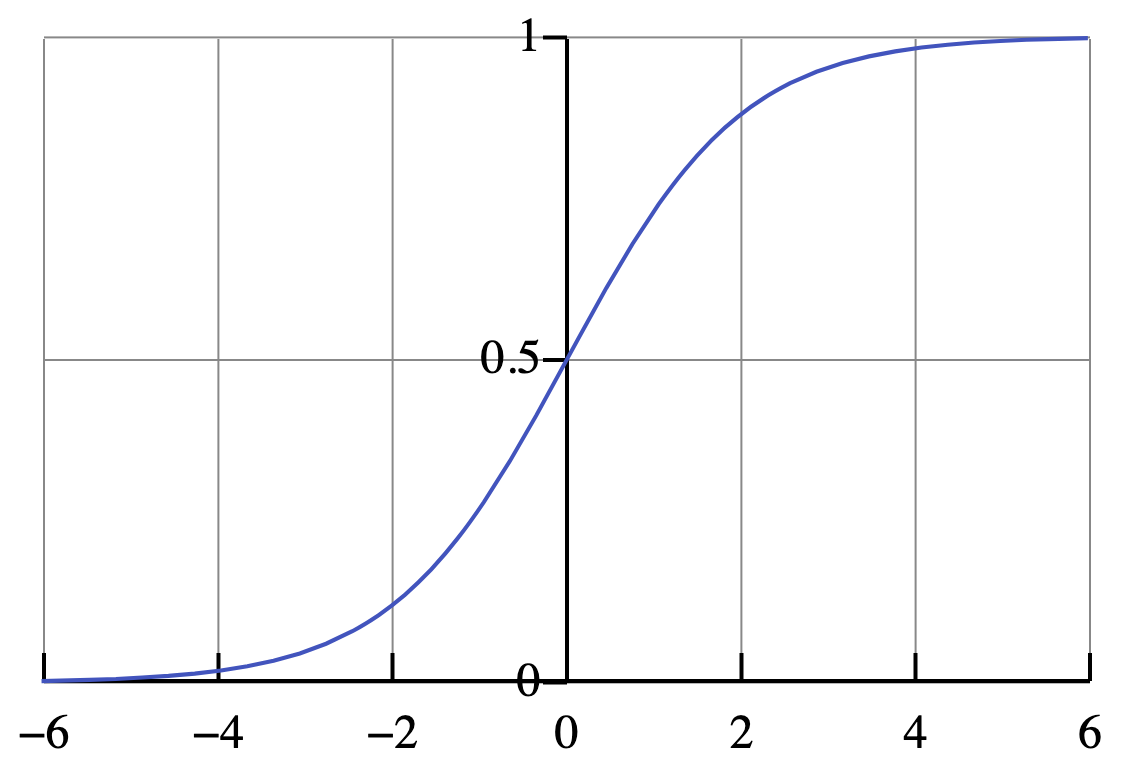


In [ ]:
# Recall how the sigmoid function takes a single number of any size
# and returns a number between 0 and 1.  You can think of sigmoid as 
# "compressing" the range (-infinity, infinity) into (0, 1):

print(sigmoid(0), sigmoid(-1), sigmoid(0.5))

# should print 0.5 0.2689414213699951 0.6224593312018546


In [ ]:
# Define a function called run_model below to run the logistic
# regression model on one feature vector (x_data).
# In other words, this function should compute 1/(1 + e^(-wx))
# where x is x_data.  But do this by calling your sigmoid function
# and the dot product function (np.dot()).

def run_model(x_data, w):
    """
    x_data: array of features (n+1)
    w: array of weights (n+1)
    returns: scalar
    """
    
    # YOUR CODE HERE
    pass

    

In [ ]:
# Sanity check: run the model from Part A on the first training example

run_model(X_train[0], w_direct)  # should be 0.9986447357583896

In [ ]:
## QUESTION:

# The run_model function only returns numbers in a certain range.  What is this range
# and why does this function not return numbers outside of that range?

# ANSWER:
#
#
#

In [ ]:
# Define a function called make_prediction that will
# actually predict the class 0 or 1 for a feature vector x_data.
# To do this, just call run_model and check if the return
# value is >= or < than 0.5

def make_prediction(x_data, w):
    """
    x_data: array of features (n+1)
    w: array of weights (n+1)
    returns: 0 or 1
    """
    
    # YOUR CODE HERE
    pass

    

In [ ]:
# Sanity check: classify the first few testing examples using the model from Part A

for i in range(10):
    print("Predicted class for test example", i, "->", make_prediction(X_test[i], w_direct))

In [ ]:
## QUESTION:

# Given the output immediately above, what is the accuracy of the model in Part A (since we used w_direct
# above) just based on these 10 testing examples?  (Answer as a percent; in other words
# the percentage of those 10 testing examples that were predicted correctly).

# ANSWER:
#
#
#

In [ ]:
# Define a function called compute_accuracy that takes a 
# set of X values and a set of y values and a parameter vector
# w.  This function should predict the class for each example x
# in X_data and based on the true y values (y_data), compute
# the accuracy on this data set.

# To do this, call make_prediction on each row of X_data
# and compare the output against the corresponding value in y_data.
# Count how many predictions are correct and divide by the total.

def compute_accuracy(X_data, y_data, w):
    """
    X_data: matrix of features (flexible rows, n+1 cols)
    y_data: vector of true classes (same number of rows as X_data)
    w: array of weights (n+1)
    returns: percentage of rows in X_data classified correctly
    """
    
    # YOUR CODE HERE
    pass

    

In [ ]:
# Sanity check

train_acc_partA = compute_accuracy(X_train, y_train, w_direct)
test_acc_partA = compute_accuracy(X_test, y_test, w_direct)

print(train_acc_partA)  # should be 0.96125
print(test_acc_partA)  # should be 0.945

In [ ]:
## QUESTION:

# Which of the two numbers above do we report as the "true" accuracy of our model,
# and why do we typically not report the other (or not give it as much importance)?

# ANSWER:
#
#
#

In [ ]:
# Define the compute_loss function below to compute the
# loss over *one* training example, given the true y value
# and the predicted y value (y_hat).  
# This is the logistic regression loss function.
# Use np.log to calculate the logarithm.

# WRITE THIS USING THE PIECEWISE DEFINITION OF THE LOGISTIC LOSS:
# L(y, y_hat) = -log(y_hat) if y=1, and -log(1-y_hat) if y=0.
# If you write it combining those two pieces together into one expression, 
# you might end up trying to calculate log(0) which doesn't exist, and your 
# code will crash.

def compute_loss(y, y_hat):
    """
    y: 0 or 1 
    y_hat: decimal number between 0 and 1
    returns: scalar
    """
    
    # YOUR CODE HERE
    pass 

    

In [ ]:
# Define the compute_cost function below to compute the
# total cost over the entire data set X_data and y_data,
# given parameters vector w.  This is your J(w) function
# Call your run_model() and compute_loss() functions 
# that you defined above.  You should have one loop.
# DO NOT CALL MAKE_PREDICTION; it's not needed here.

def compute_cost(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: scalar
    """
        
    # YOUR CODE HERE
    pass

    

In [ ]:
# Sanity check: compute the loss for w_direct from Part A:

w_direct_cost = compute_cost(X_train, y_train, w_direct)  # This is the minimum cost we can ever get!  Should be less than 0.1.
print(w_direct_cost)

In [ ]:
## QUESTION:

# compute_cost() above returns a single number, but based on the formula in J(w),
# it cannot return all possible numbers in the range (-infinity, +infinity).  What
# is the range of numbers 

# ANSWER:
#
#
#

In [ ]:
# Define the compute_gradient function below to compute
# the complete gradient for the function J(w).  
# Do not use matrix computations here; call your run_model() function
# that you defined above.  You should have two nested loops.

def compute_gradient(X_data, y_data, w):
    """
    X_data: matrix (m, n+1)
    y_data: array of true y values (m)
    w: array of weights (n+1)
    returns: array of gradients (n+1)
    """
    
    # YOUR CODE HERE
    pass
    
    
    

In [ ]:
# Write code here to perform gradient descent, using your
# functions above.  You should use three new variables in your
# code:
# - w_manual: which is the vector of weights that gradient
#   descent is designed to find:
# - w_manual_cost, which is the cost of these weights,
# - J_list, which is the list of 
#   costs determined by compute_cost() [like in the in-class lab we did].

# Setup these vars:
w_manual = np.zeros(WHAT GOES HERE?)  # n+1 weights
w_manual_cost = 0
J_list = []

# YOUR CODE HERE


    
print("Final w:", w_manual)

In [ ]:
# Plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_list)), J_list)
plt.show()

In [ ]:
# Keep playing around with gradient descent until you have a good
# learning curve in the plot above (something that appears to flatten out).
# Then answer the questions below. 

# What was your initial choice for alpha?  Your final choice?  How did
# you arrive at these choices?
#
# YOUR ANSWER HERE
#
# How many iterations of gradient descent did you need until convergence?
#
# YOUR ANSWER HERE
#
# What was your final vector of weights? (w_manual)
#
# YOUR ANSWER HERE
#
# What was your final cost of these weights? (w_manual_cost)
#
# YOUR ANSWER HERE
#
# What was your final vector of weights from Part A? (w_direct)
#
# YOUR ANSWER HERE
#
# What cost of these weights? (w_direct_cost)
#
# YOUR ANSWER HERE
#
# How close are your weights from Part B to the "correct" weights from Part A?
#
# YOUR ANSWER HERE
#
#


In [ ]:
# Write code here to compute the accuracy of the new model (the one you just trained)
# on the training and testing data sets.  
# Save these values to two variables called train_acc_partB and test_acc_partB.

# YOUR CODE HERE


print(train_acc_partB)  
print(test_acc_partB)  

In [ ]:
## QUESTION:

# How does the accuracy of the model you created by hand in Part B compare to 
# the accuracy of the model from Part A created by scikit-learn?

# ANSWER:
#
#
#
#


In [ ]:
# Final checkpoint

# All of these should print OK and match up with what you have above:

print("Part A")
print("Weights:", w_direct)
print("Cost:", w_direct_cost)
print("Training accuracy:", train_acc_partA)
print("Testing accuracy:", test_acc_partA)
print()
print("Part B")
print("Weights:", w_manual)
print("Cost:", w_manual_cost)
print("Training accuracy:", train_acc_partB)
print("Testing accuracy:", test_acc_partB)
print()
